In [ ]:
# Import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read inflation rate data
df_inf = pd.read_csv("/content/Inflation Rates.csv")

print(df_inf.shape)
df_inf.head()

(232, 4)


,Year,Month,Annual Average Inflation,12-Month Inflation
0,2024,March,6.97,5.70
1,2024,February,7.26,6.31
2,2024,January,7.50,6.85
3,2023,December,7.67,6.63
4,2023,November,7.87,6.80


In [ ]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      232 non-null    int64  
 1   Month                     232 non-null    object 
 2   Annual Average Inflation  232 non-null    float64
 3   12-Month Inflation        232 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.4+ KB


In [ ]:
df_inf.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,232.000000,232.000000,232.000000
mean,2014.150862,7.726078,7.560043
std,5.567267,3.325698,3.939082
min,2005.000000,3.930000,1.850000
25%,2009.000000,5.505000,5.155000
50%,2014.000000,6.560000,6.440000
75%,2019.000000,8.537500,8.367500
max,2024.000000,17.070000,19.720000


In [ ]:
av_inf_max_min = df_inf[df_inf['Annual Average Inflation'].isin([df_inf['Annual Average Inflation'].max(), df_inf['Annual Average Inflation'].min()])]
print(av_inf_max_min)

     Year    Month  Annual Average Inflation  12-Month Inflation
159  2011  January                      3.93                5.42
181  2009    March                     17.07               14.60


In [ ]:
av_inf_max_min = df_inf[df_inf['12-Month Inflation'].isin([df_inf['12-Month Inflation'].max(), df_inf['12-Month Inflation'].min()])]
print(av_inf_max_min)

     Year     Month  Annual Average Inflation  12-Month Inflation
149  2011  November                     12.82               19.72
204  2007     April                      4.69                1.85


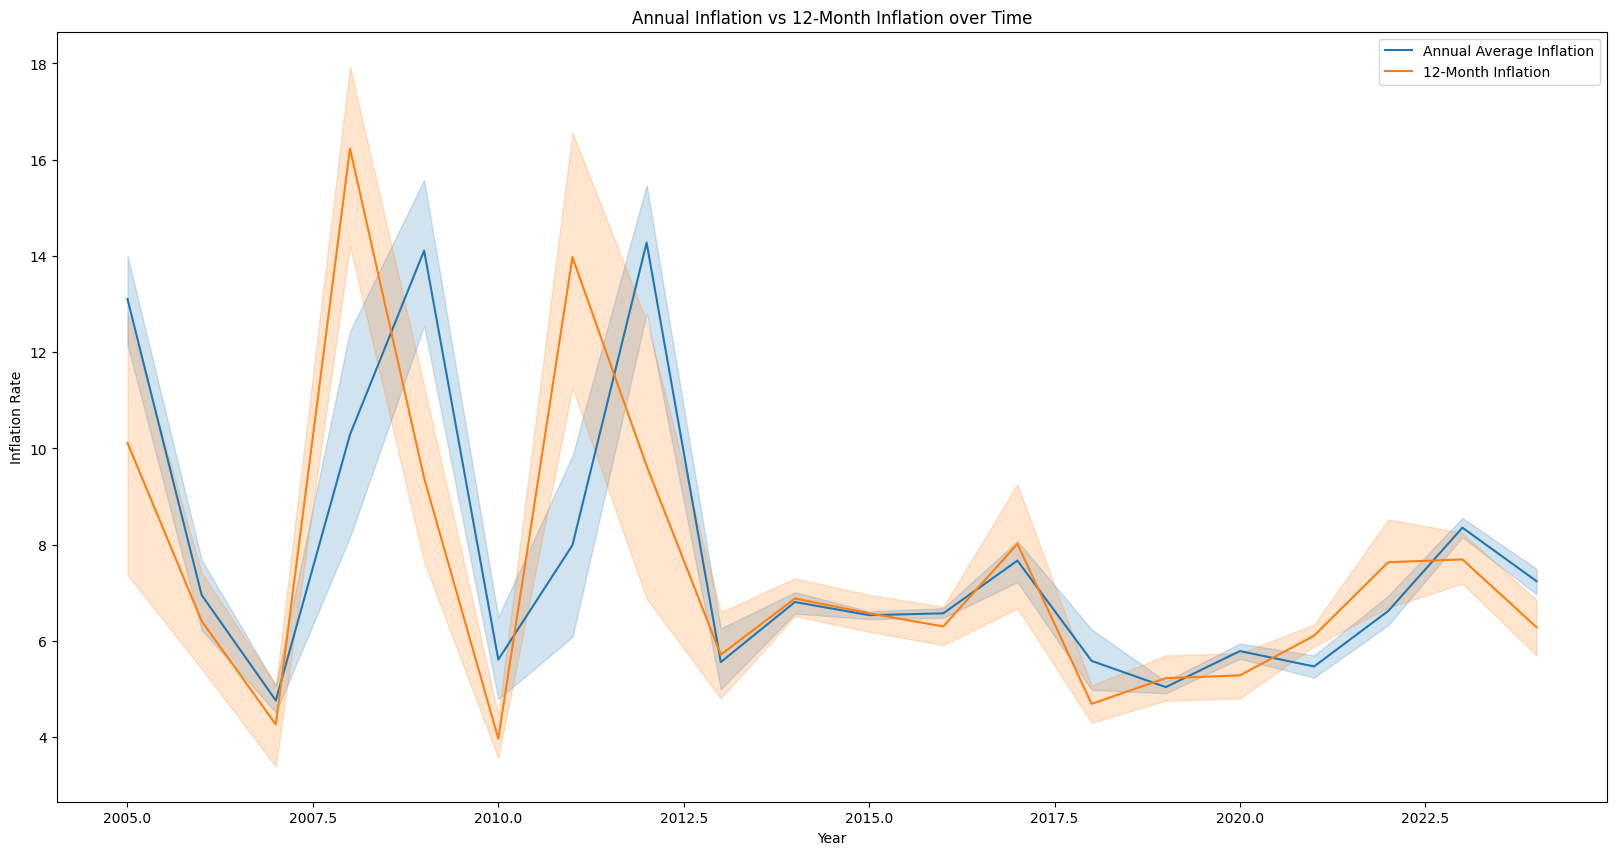

In [ ]:
# Annual vs 12-Month Inflation over Time
plt.figure(figsize = (20,10))
sns.lineplot(data=df_inf, x='Year', y='Annual Average Inflation', label='Annual Average Inflation')
sns.lineplot(data=df_inf, x='Year', y='12-Month Inflation', label='12-Month Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Annual Inflation vs 12-Month Inflation over Time')
_ = plt.legend()

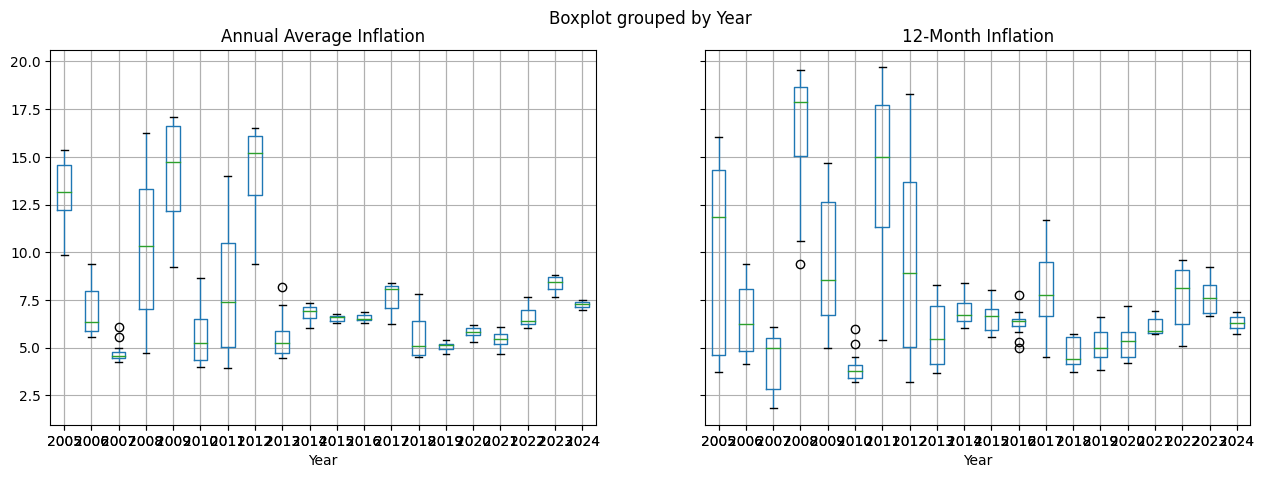

In [ ]:
df_inf.boxplot(column=['Annual Average Inflation', '12-Month Inflation'], by='Year', figsize=(20, 5));

In [ ]:
# Read inflation rate data
df_inf = pd.read_csv("/content/Inflation Rates.csv")

print(df_inf.shape)
df_inf.head()